# Black Friday Sales Prediction

## Problem Statement 
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

## User expection
Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

## Data - Definition
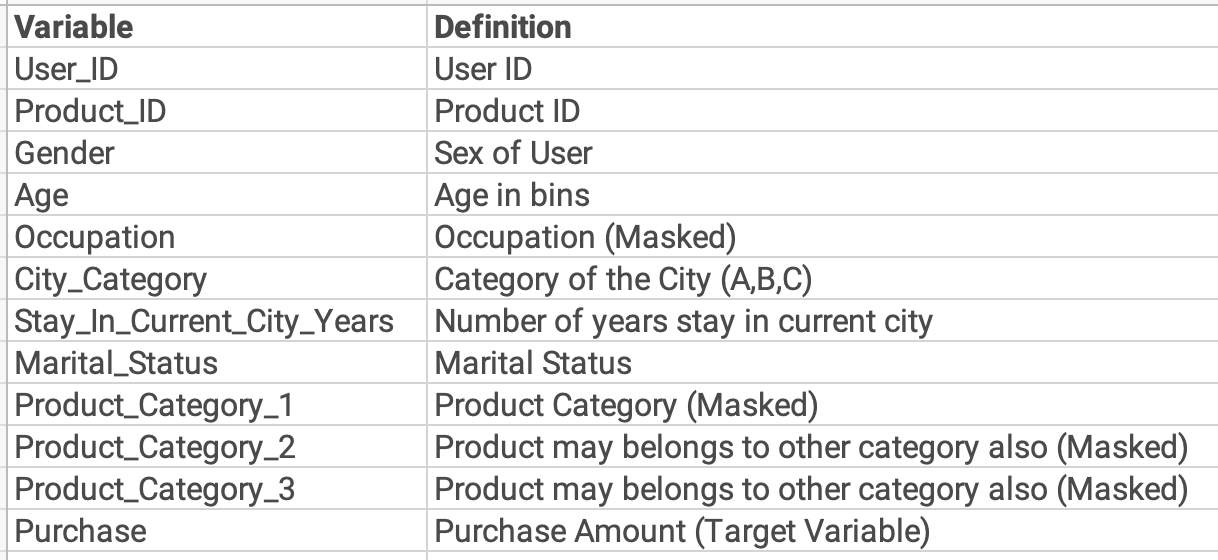



# Problem Type - Supervised learning
## Target - Purchase (Purchase Amount)

In [61]:
# Importing Requried libraires

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce


In [62]:
os.getcwd()

'/Users/bkannadasan/Documents/GitHub/DataScience/MachineLearning/Linear_regression_practice/Black_Friday_Prediction'

In [63]:
train_ds = pd.read_csv('train.csv')

In [64]:
train_ds.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [65]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [66]:
train_ds.shape

(550068, 12)

In [67]:
train_ds_bkp = train_ds

In [68]:
train_ds.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [69]:
test_ds = pd.read_csv('test.csv')

In [70]:
test_ds.shape

(233599, 11)

In [71]:
train_ds.columns.difference(test_ds.columns)

Index(['Purchase'], dtype='object')

## Both Train and Test holds information about 2 major categories User and Product

### User
User_ID - int64

Gender - object

Age - object

Occupation - int64

City_Category - object

Stay_In_Current_City_Years - object

Marital_Status - int64

### Product
Product_ID - object

Product_Category_1 - int64

Product_Category_2 - float64

Product_Category_3 - float64

## Target
Purchase

In [72]:
train_ds.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [73]:
train_ds.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [74]:
cat_cols = train_ds.select_dtypes(include='object')
print(cat_cols.columns)
cat_cols.nunique()

Index(['Product_ID', 'Gender', 'Age', 'City_Category',
       'Stay_In_Current_City_Years'],
      dtype='object')


Product_ID                    3631
Gender                           2
Age                              7
City_Category                    3
Stay_In_Current_City_Years       5
dtype: int64

In [75]:
train_ds['User_ID'].nunique()

5891

In [76]:
train_ds.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

In [77]:
for i in train_ds.columns:
    print(i,'\n',train_ds[i].unique())

User_ID 
 [1000001 1000002 1000003 ... 1004113 1005391 1001529]
Product_ID 
 ['P00069042' 'P00248942' 'P00087842' ... 'P00370293' 'P00371644'
 'P00370853']
Gender 
 ['F' 'M']
Age 
 ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
Occupation 
 [10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
City_Category 
 ['A' 'C' 'B']
Stay_In_Current_City_Years 
 ['2' '4+' '3' '1' '0']
Marital_Status 
 [0 1]
Product_Category_1 
 [ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]
Product_Category_2 
 [nan  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]
Product_Category_3 
 [nan 14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.]
Purchase 
 [ 8370 15200  1422 ...   135   123   613]


In [78]:
train_ds['Gender'].value_counts()

Gender
M    414259
F    135809
Name: count, dtype: int64

In [79]:
for i in ['Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status','Product_Category_1']:
    print(train_ds[i].value_counts().sort_values(ascending=False))

Gender
M    414259
F    135809
Name: count, dtype: int64
Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64
Occupation
4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: count, dtype: int64
City_Category
B    231173
C    171175
A    147720
Name: count, dtype: int64
Stay_In_Current_City_Years
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: count, dtype: int64
Marital_Status
0    324731
1    225337
Name: count, dtype: int64
Product_Category_1
5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523


In [80]:
obj_cols = train_ds.select_dtypes(include='object').columns
num_cols = train_ds.select_dtypes(exclude='object').columns

print('Object-Columns','\n',obj_cols,'\n\n','Number-Columns','\n',num_cols)

Object-Columns 
 Index(['Product_ID', 'Gender', 'Age', 'City_Category',
       'Stay_In_Current_City_Years'],
      dtype='object') 

 Number-Columns 
 Index(['User_ID', 'Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')


In [81]:
train_ds[num_cols].corr()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023971,0.020443,0.003825,0.001529,0.003419,0.004716
Occupation,-0.023971,1.000000,0.024280,-0.007618,-0.000384,0.013263,0.020833
Marital_Status,0.020443,0.024280,1.000000,0.019888,0.015138,0.019473,-0.000463
Product_Category_1,0.003825,-0.007618,0.019888,1.000000,0.540583,0.229678,-0.343703
Product_Category_2,0.001529,-0.000384,0.015138,0.540583,1.000000,0.543649,-0.209918
Product_Category_3,0.003419,0.013263,0.019473,0.229678,0.543649,1.000000,-0.022006
Purchase,0.004716,0.020833,-0.000463,-0.343703,-0.209918,-0.022006,1.000000


In [82]:
train_ds

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


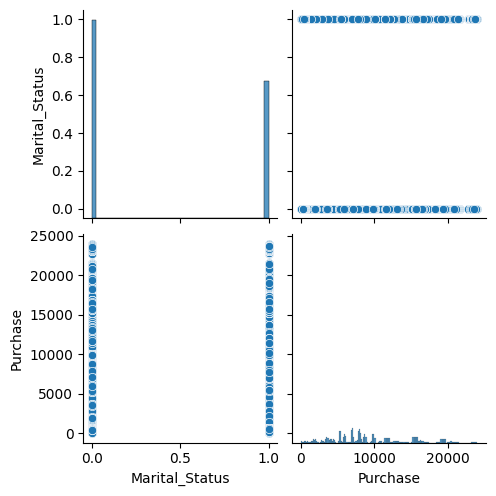

In [194]:
sns.pairplot(train_ds)
# plt.show()

In [84]:
train_ds.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [85]:
train_ds[train_ds['Product_Category_2'].isna()].head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871
11,1000005,P00014542,M,26-35,20,A,1,1,8,NaN,NaN,3957


In [86]:
train_ds[train_ds['Product_Category_3'].isna()].head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227


In [87]:
train_ds[(~train_ds['Product_Category_3'].isna())&(~train_ds['Product_Category_2'].isna())].head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
13,1000005,P00145042,M,26-35,20,A,1,1,1,2.0,5.0,15665
14,1000006,P00231342,F,51-55,9,A,1,0,5,8.0,14.0,5378
16,1000006,P0096642,F,51-55,9,A,1,0,2,3.0,4.0,13055


In [88]:
train_ds.groupby('Product_ID').User_ID.count().sort_values(ascending=False)

Product_ID
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00068742       1
P00012342       1
P00162742       1
P00091742       1
P00231642       1
Name: User_ID, Length: 3631, dtype: int64

In [89]:
train_ds.groupby(['User_ID', 'Product_ID']).size()

User_ID  Product_ID
1000001  P00000142     1
         P00004842     1
         P00025442     1
         P00051442     1
         P00051842     1
                      ..
1006040  P00331042     1
         P00331942     1
         P00343042     1
         P00346242     1
         P00349442     1
Length: 550068, dtype: int64

In [90]:
train_ds.groupby(['User_ID', 'Product_ID']).size().reset_index(name='count').sort_values(by='count', ascending=False)

,User_ID,Product_ID,count
0,1000001,P00000142,1
366707,1004007,P00105342,1
366721,1004007,P00115942,1
366720,1004007,P00115142,1
366719,1004007,P00114942,1
...,...,...,...
183350,1001973,P00265242,1
183349,1001973,P00226342,1
183348,1001973,P00198042,1
183347,1001973,P00129842,1


In [91]:
train_ds.groupby(['User_ID', 'Product_ID']).size().reset_index(name='count')

,User_ID,Product_ID,count
0,1000001,P00000142,1
1,1000001,P00004842,1
2,1000001,P00025442,1
3,1000001,P00051442,1
4,1000001,P00051842,1
...,...,...,...
550063,1006040,P00331042,1
550064,1006040,P00331942,1
550065,1006040,P00343042,1
550066,1006040,P00346242,1


In [92]:
train_ds['User_ID'].value_counts().sort_values(ascending=False)

User_ID
1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002690       7
1002111       7
1005810       7
1004991       7
1000708       6
Name: count, Length: 5891, dtype: int64

In [93]:
train_ds[train_ds['User_ID']=='1001680']

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase


In [94]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [95]:
train_ds.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [96]:
train_ds['New_User_ID']=train_ds['User_ID'].astype('object')

In [97]:
train_ds[['New_User_ID','User_ID']].dtypes

New_User_ID    object
User_ID         int64
dtype: object

In [98]:
train_ds[['New_User_ID','User_ID']]

,New_User_ID,User_ID
0,1000001,1000001
1,1000001,1000001
2,1000001,1000001
3,1000001,1000001
4,1000002,1000002
...,...,...
550063,1006033,1006033
550064,1006035,1006035
550065,1006036,1006036
550066,1006038,1006038


In [99]:
train_ds[train_ds['New_User_ID']=='1000001']

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,New_User_ID


In [100]:
train_ds['New_User_ID'].unique()

array([1000001, 1000002, 1000003, ..., 1004113, 1005391, 1001529],
      dtype=object)

In [101]:
train_ds['New_User_ID'] = train_ds['New_User_ID'].astype(str).str.strip()

In [102]:
train_ds[['New_User_ID','User_ID']].dtypes

New_User_ID    object
User_ID         int64
dtype: object

In [103]:
train_ds[train_ds['New_User_ID']=='1000001']

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,New_User_ID
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370,1000001
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,1000001
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422,1000001
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057,1000001
39180,1000001,P00085942,F,0-17,10,A,2,0,2,4.0,8.0,12842,1000001
78144,1000001,P00102642,F,0-17,10,A,2,0,4,8.0,9.0,2763,1000001
78145,1000001,P00110842,F,0-17,10,A,2,0,1,2.0,5.0,11769,1000001
78146,1000001,P00004842,F,0-17,10,A,2,0,3,4.0,12.0,13645,1000001
116848,1000001,P00117942,F,0-17,10,A,2,0,5,15.0,NaN,8839,1000001
116849,1000001,P00258742,F,0-17,10,A,2,0,5,NaN,NaN,6910,1000001


In [104]:
chk_val=train_ds.groupby(['Product_ID','New_User_ID']).Product_Category_1.count()
type(chk_val)

pandas.core.series.Series

In [105]:
chk_val=pd.DataFrame(chk_val)

In [106]:
chk_val.head()

Product_Category_1
Product_ID New_User_ID                    
P00000142  1000001                       1
           1000006                       1
           1000018                       1
           1000021                       1
           1000023                       1

In [107]:
chk_val[chk_val['Product_Category_1']>1]

,,Product_Category_1
Product_ID,New_User_ID,


In [108]:
train_ds['User_ID']=train_ds['New_User_ID']

In [109]:
train_ds=train_ds.drop(columns=['New_User_ID'])

In [110]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  object 
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 50.4+ MB


In [111]:
train_ds['Product_Category_2']=train_ds['Product_Category_2'].fillna(0)
train_ds['Product_Category_3']=train_ds['Product_Category_3'].fillna(0)

In [112]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  object 
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Product_Category_3          550068 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 50.4+ MB


In [113]:
train_ds['Product_Category_2'].value_counts().count()

np.int64(18)

In [114]:
train_ds['Product_Category_3'].value_counts().count()

np.int64(16)

In [115]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  object 
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Product_Category_3          550068 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 50.4+ MB


In [116]:
train_ds['Product_Category_1']=train_ds['Product_Category_1'].astype(str).str.strip()
train_ds['Product_Category_2']=train_ds['Product_Category_2'].astype(str).str.strip()
train_ds['Product_Category_3']=train_ds['Product_Category_3'].astype(str).str.strip()

In [117]:
train_ds['Occupation']=train_ds['Occupation'].astype(str).str.strip()

In [118]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  object
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  object
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category_1          550068 non-null  object
 9   Product_Category_2          550068 non-null  object
 10  Product_Category_3          550068 non-null  object
 11  Purchase                    550068 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 50.4+ MB


In [119]:
import category_encoders as ce

In [120]:
encoder=ce.BinaryEncoder(cols=['User_ID','Product_ID','Occupation','Product_Category_1','Product_Category_2','Product_Category_3'])
train_encoded_ds = encoder.fit_transform(train_ds)

In [121]:
train_encoded_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 51 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID_0                   550068 non-null  int64 
 1   User_ID_1                   550068 non-null  int64 
 2   User_ID_2                   550068 non-null  int64 
 3   User_ID_3                   550068 non-null  int64 
 4   User_ID_4                   550068 non-null  int64 
 5   User_ID_5                   550068 non-null  int64 
 6   User_ID_6                   550068 non-null  int64 
 7   User_ID_7                   550068 non-null  int64 
 8   User_ID_8                   550068 non-null  int64 
 9   User_ID_9                   550068 non-null  int64 
 10  User_ID_10                  550068 non-null  int64 
 11  User_ID_11                  550068 non-null  int64 
 12  User_ID_12                  550068 non-null  int64 
 13  Product_ID_0                5

In [122]:
train_ds['Stay_In_Current_City_Years'].value_counts()

Stay_In_Current_City_Years
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: count, dtype: int64

In [123]:
city_stay = {'0':0,'1':1,'2':2,'3':3,'4':4,'4+':5}

In [124]:
train_encoded_ds['Stay_In_Current_City_Years']=train_encoded_ds['Stay_In_Current_City_Years'].map(city_stay)

In [125]:
train_encoded_ds['Stay_In_Current_City_Years'].dtypes

dtype('int64')

In [126]:
train_encoded_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 51 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID_0                   550068 non-null  int64 
 1   User_ID_1                   550068 non-null  int64 
 2   User_ID_2                   550068 non-null  int64 
 3   User_ID_3                   550068 non-null  int64 
 4   User_ID_4                   550068 non-null  int64 
 5   User_ID_5                   550068 non-null  int64 
 6   User_ID_6                   550068 non-null  int64 
 7   User_ID_7                   550068 non-null  int64 
 8   User_ID_8                   550068 non-null  int64 
 9   User_ID_9                   550068 non-null  int64 
 10  User_ID_10                  550068 non-null  int64 
 11  User_ID_11                  550068 non-null  int64 
 12  User_ID_12                  550068 non-null  int64 
 13  Product_ID_0                5

In [127]:
train_encoded_ds = pd.get_dummies(train_encoded_ds,columns=['Gender'],dtype='int')

In [128]:
train_encoded_ds = pd.get_dummies(train_encoded_ds,columns=['Age'],dtype='int')

In [129]:
train_encoded_ds= pd.get_dummies(train_encoded_ds,columns=['City_Category'],dtype='int')

In [130]:
train_encoded_ds

,User_ID_0,User_ID_1,User_ID_2,User_ID_3,User_ID_4,User_ID_5,User_ID_6,User_ID_7,User_ID_8,User_ID_9,...,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1,0,1,0,0,1,1,0,0,1,...,0,0,0,0,0,1,0,0,1,0
550064,1,0,1,0,0,1,1,0,1,0,...,0,0,1,0,0,0,0,0,0,1
550065,1,0,1,0,0,1,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
550066,1,0,1,1,0,1,1,1,1,0,...,0,0,0,0,0,0,1,0,0,1


In [131]:
train_encoded_ds_y=train_encoded_ds['Purchase']

In [132]:
train_encoded_ds_y

0          8370
1         15200
2          1422
3          1057
4          7969
          ...  
550063      368
550064      371
550065      137
550066      365
550067      490
Name: Purchase, Length: 550068, dtype: int64

In [133]:
train_encoded_ds=train_encoded_ds.drop(columns='Purchase')

In [134]:
train_encoded_ds['Purchase']=train_encoded_ds_y

In [135]:
train_encoded_ds.corr()

,User_ID_0,User_ID_1,User_ID_2,User_ID_3,User_ID_4,User_ID_5,User_ID_6,User_ID_7,User_ID_8,User_ID_9,...,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C,Purchase
User_ID_0,1.000000,-0.436990,-0.250640,-0.064791,-7.226814e-02,-0.026088,0.002369,-0.033238,-0.004805,-0.009916,...,-0.038300,0.007488,0.010102,0.026932,-0.011104,0.010494,-0.006026,-0.023239,0.030544,0.002544
User_ID_1,-0.436990,1.000000,0.117971,0.024141,4.249910e-02,-0.012720,0.010252,0.024577,0.009423,0.015257,...,-0.028612,0.029441,0.014864,0.004859,0.004967,-0.002406,-0.019969,0.028691,-0.011472,0.010631
User_ID_2,-0.250640,0.117971,1.000000,-0.082556,-7.901527e-02,-0.022240,-0.046617,-0.025423,-0.005671,0.007191,...,-0.020241,0.008060,-0.022438,0.015344,0.013291,0.006512,-0.069896,0.038550,0.025811,-0.004852
User_ID_3,-0.064791,0.024141,-0.082556,1.000000,1.721795e-02,-0.005975,0.025985,-0.008330,0.013449,-0.001892,...,0.017549,0.008086,-0.015384,-0.017386,-0.011310,-0.011808,0.019667,-0.023270,0.005982,-0.001333
User_ID_4,-0.072268,0.042499,-0.079015,0.017218,1.000000e+00,0.007190,0.009951,-0.004934,-0.003287,-0.007857,...,0.024130,-0.011047,-0.014411,-0.018703,0.024747,-0.012322,0.016722,0.010268,-0.026956,-0.016876
User_ID_5,-0.026088,-0.012720,-0.022240,-0.005975,7.190095e-03,1.000000,-0.001473,0.009958,-0.004901,-0.012157,...,0.002180,-0.005500,0.010950,0.005601,0.005897,-0.038387,-0.030326,0.034030,-0.007251,0.001067
User_ID_6,0.002369,0.010252,-0.046617,0.025985,9.950658e-03,-0.001473,1.000000,0.027302,0.017980,-0.003874,...,0.018839,0.023305,-0.022504,-0.031932,0.002415,0.002728,-0.016863,0.000099,0.016037,0.009128
User_ID_7,-0.033238,0.024577,-0.025423,-0.008330,-4.934197e-03,0.009958,0.027302,1.000000,0.003426,0.016346,...,0.016895,0.017879,-0.032456,-0.002379,0.004675,-0.002248,-0.033679,0.020964,0.009890,0.005862
User_ID_8,-0.004805,0.009423,-0.005671,0.013449,-3.286554e-03,-0.004901,0.017980,0.003426,1.000000,0.003307,...,0.023062,0.008388,0.009693,0.007189,-0.061728,-0.005100,0.019829,-0.005206,-0.013431,0.004169
User_ID_9,-0.009916,0.015257,0.007191,-0.001892,-7.857137e-03,-0.012157,-0.003874,0.016346,0.003307,1.000000,...,-0.038809,0.029291,0.027428,-0.013755,-0.010264,-0.009701,0.028114,-0.016367,-0.009464,-0.003221


In [136]:
train_encoded_ds.head(1).T

,0
User_ID_0,0
User_ID_1,0
User_ID_2,0
User_ID_3,0
User_ID_4,0
User_ID_5,0
User_ID_6,0
User_ID_7,0
User_ID_8,0
User_ID_9,0


In [137]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [138]:
scaling = StandardScaler()
train_encoded_ds['Stay_In_Current_City_Years']=scaling.fit_transform(train_encoded_ds[['Stay_In_Current_City_Years']])

In [170]:
train_encoded_ds['Stay_In_Current_City_Years'].head(5)

0   -0.007947
1   -0.007947
2   -0.007947
3   -0.007947
4    1.907631
Name: Stay_In_Current_City_Years, dtype: float64

In [173]:
train_encoded_ds=train_encoded_ds.drop(columns='Purchase')

In [174]:
train_X,val_X,train_y,val_y = train_test_split (train_encoded_ds,train_encoded_ds_y,test_size=.3,random_state=30)

In [175]:
print(train_X.shape)
print(val_X.shape)
print(train_y.shape)
print(val_y.shape)

(385047, 59)
(165021, 59)
(385047,)
(165021,)


In [176]:
model = LinearRegression()

In [177]:
model.fit(train_X,train_y)

LinearRegression()

In [178]:
model.coef_

array([ 6.58708745e+01,  8.97760277e+01, -6.40351915e+01, -1.38866131e+00,
       -1.23951481e+02,  1.57517034e+01,  3.76939444e+01,  3.77661565e+01,
        4.63223978e+01, -3.07792861e+01,  6.08342966e+01, -2.92536868e+00,
       -1.87491193e+01, -2.19518848e+03, -1.41350437e+03, -3.46472156e+02,
       -5.41867950e+02, -1.04170531e+02,  4.31681132e+01, -2.87338580e+02,
        2.49895325e+02, -5.32539948e+01, -1.10437115e+02, -1.74880986e+02,
       -1.13954250e+02, -1.81008463e+01, -2.59278937e+00, -1.16070007e+02,
       -1.11010031e+02,  1.38842500e+01,  6.16498299e+00, -2.01906138e+01,
        1.92757145e+03,  2.57253694e+02, -2.94203204e+03, -5.11903935e+02,
       -2.14363094e+03,  7.52640862e+01,  3.81271457e+02,  8.55894329e+02,
       -2.25950830e+02, -2.70173888e+02,  3.74728376e+03,  8.43843447e+02,
        8.41026182e+01,  6.10155024e+02, -5.37938412e+02,  3.63327907e+15,
        3.63327907e+15, -1.80408566e+15, -1.80408566e+15, -1.80408566e+15,
       -1.80408566e+15, -

In [179]:
model.intercept_

np.float64(-2604783551391988.0)

In [180]:
train_pred = model.predict(train_X)
val_pred = model.predict(val_X)

In [147]:
from sklearn.metrics import root_mean_squared_error,r2_score,mean_absolute_percentage_error

In [181]:
print('Train RMSE:',root_mean_squared_error(train_y,train_pred))
print('Val RMSE:',root_mean_squared_error(val_y,val_pred))

Train RMSE: 4181.826433754168
Val RMSE: 4185.048499088128


In [182]:
print('Train R2:',r2_score(train_y,train_pred))
print('Val R2:',r2_score(val_y,val_pred))

Train R2: 0.3063946218471927
Val R2: 0.3070122615690615


In [183]:
print('Train MAPE:',mean_absolute_percentage_error(train_y,train_pred))
print('Val MAPE:',mean_absolute_percentage_error(val_y,val_pred))

Train MAPE: 1.4987534636508568
Val MAPE: 1.5421782716969068


In [184]:
from sklearn.preprocessing import PolynomialFeatures

In [152]:
ply2=PolynomialFeatures(degree=2,include_bias=False)
ply3=PolynomialFeatures(degree=3,include_bias=False)
ply4=PolynomialFeatures(degree=4,include_bias=False)
ply5=PolynomialFeatures(degree=5,include_bias=False)


In [185]:
ply2_train_X = ply2.fit_transform(train_X)

In [186]:
train_X.shape

(385047, 59)

In [169]:
train_X.head()

,User_ID_0,User_ID_1,User_ID_2,User_ID_3,User_ID_4,User_ID_5,User_ID_6,User_ID_7,User_ID_8,User_ID_9,...,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C,Purchase
85496,0,0,1,0,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,1,5146
340986,0,1,1,1,1,0,1,0,1,0,...,0,1,0,0,0,0,0,1,0,5192
274832,0,0,0,0,1,0,0,1,1,1,...,0,0,1,0,0,0,0,1,0,6897
487004,0,1,0,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,0,6969
180124,0,1,1,0,1,0,0,1,0,1,...,0,1,0,0,0,0,1,0,0,3612


In [188]:
ply2_train_X.shape

(385047, 1829)

In [191]:
type(ply2_train_X)

numpy.ndarray

In [193]:
len(ply2_train_X[0].T)

1829

In [156]:
# ply2_val_X = ply2.transform(val_X)

In [157]:
# ply2_train_pred = model.predict(train_X)
# ply2_val_pred = model.predict(val_X)

In [158]:
# print('Ply2 Train R2:',r2_score(train_y,ply2_train_pred))
# print('Ply2 Val R2:',r2_score(val_y,ply2_val_pred))

In [159]:
# ply3_train_X =  ply3.fit_transform(train_X)

In [160]:
# train_ds = pd.read_csv('train.csv')
# train_ds['Product_Category_2']=train_ds['Product_Category_2'].fillna(0)
# train_ds['Product_Category_3']=train_ds['Product_Category_3'].fillna(0)
# train_ds['Product_Category_1']=train_ds['Product_Category_1'].astype(str).str.strip()
# train_ds['Product_Category_2']=train_ds['Product_Category_2'].astype(str).str.strip()
# train_ds['Product_Category_3']=train_ds['Product_Category_3'].astype(str).str.strip()
# train_ds['Occupation']=train_ds['Occupation'].astype(str).str.strip()
# encoder=ce.BinaryEncoder(cols=['User_ID','Product_ID','Occupation','Product_Category_1','Product_Category_2','Product_Category_3'])
# train_encoded_ds = encoder.fit_transform(train_ds)
# city_stay = {'0':0,'1':1,'2':2,'3':3,'4':4,'4+':5}
# train_encoded_ds['Stay_In_Current_City_Years']=train_encoded_ds['Stay_In_Current_City_Years'].map(city_stay)
# train_encoded_ds = pd.get_dummies(train_encoded_ds,columns=['Gender'],dtype='int')
# train_encoded_ds = pd.get_dummies(train_encoded_ds,columns=['Age'],dtype='int')
# train_encoded_ds= pd.get_dummies(train_encoded_ds,columns=['City_Category'],dtype='int')
# train_encoded_ds_y=train_encoded_ds['Purchase']
# train_encoded_ds=train_encoded_ds.drop(columns='Purchase')
# train_encoded_ds.columns
# scaling = StandardScaler()
# train_encoded_ds['Stay_In_Current_City_Years']=scaling.fit_transform(train_encoded_ds[['Stay_In_Current_City_Years']])
# train_X,val_X,train_y,val_y = train_test_split (train_encoded_ds,train_encoded_ds_y,test_size=.3,random_state=30)
# model = LinearRegression()
# model.fit(train_X,train_y)
# model.coef_
# model.intercept_